# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [18]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 629


In [22]:
capitalized_cities = [city.capitalize() for city in cities]
cities = capitalized_cities
cities

['Placerville',
 'Buncrana',
 'Waitangi',
 'Georgetown',
 'Ushuaia',
 'Grytviken',
 'Blackmans bay',
 'Hundested',
 'Junction city',
 'Waingapu',
 'Bikenibeu village',
 'Hermanus',
 'Tazovsky',
 'Isafjordur',
 'Codrington',
 'Bethel',
 'Bredasdorp',
 'Iqaluit',
 'Puerto natales',
 'West island',
 'Connellsville',
 'Singkil',
 'Cidreira',
 'Port-aux-francais',
 'Aasiaat',
 'Jamestown',
 'Port mathurin',
 'Invercargill',
 'Puerto ayora',
 'Avarua',
 'Bilibino',
 'Taiohae',
 'Kavaratti',
 'Tura',
 'Roswell',
 'La passe',
 'Afaahiti',
 'Kerikeri',
 'Tindouf',
 'Nantucket',
 'Bovalino',
 'Wailua homesteads',
 'Ilula',
 'Fuvahmulah',
 'Booue',
 'Placido de castro',
 'Qaqortoq',
 'Mombetsu',
 'College',
 'Ribeira grande',
 'Mazidagi',
 'Papatowai',
 'Babina',
 'Whitehorse',
 'Petropavlovsk-kamchatsky',
 'Guerrero negro',
 'Lihue',
 'Morehead city',
 'Albany',
 'Longyearbyen',
 'Saldanha',
 'Thompson',
 'Labrador city',
 'Port elizabeth',
 'Iskateley',
 'Talnakh',
 'Howrah',
 'Keflavik',
 'Cam

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(2)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Placerville
Processing Record 2 of Set 1 | Buncrana
Processing Record 3 of Set 1 | Waitangi
Processing Record 4 of Set 1 | Georgetown
Processing Record 5 of Set 1 | Ushuaia
Processing Record 6 of Set 1 | Grytviken
Processing Record 7 of Set 1 | Blackmans bay
Processing Record 8 of Set 1 | Hundested
Processing Record 9 of Set 1 | Junction city
Processing Record 10 of Set 1 | Waingapu
Processing Record 11 of Set 1 | Bikenibeu village
Processing Record 12 of Set 1 | Hermanus
Processing Record 13 of Set 1 | Tazovsky
Processing Record 14 of Set 1 | Isafjordur
Processing Record 15 of Set 1 | Codrington
Processing Record 16 of Set 1 | Bethel
Processing Record 17 of Set 1 | Bredasdorp
Processing Record 18 of Set 1 | Iqaluit
Processing Record 19 of Set 1 | Puerto natales
Processing Record 20 of Set 1 | West island
Processing Record 21 of Set 1 | Connellsville
Processing Record 22 of Set 1 | Singkil
Proces

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          612
Lat           612
Lng           612
Max Temp      612
Humidity      612
Cloudiness    612
Wind Speed    612
Country       612
Date          612
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Placerville,38.7296,-120.7986,291.71,31,0,0.00,US,1731196395
1,Buncrana,55.1333,-7.4500,284.51,92,100,3.82,IE,1731196295
2,Waitangi,-43.9535,-176.5597,286.12,89,77,4.41,NZ,1731196422
3,Georgetown,5.4112,100.3354,300.11,82,20,1.54,MY,1731195756
4,Ushuaia,-54.8000,-68.3000,279.96,81,40,1.54,AR,1731196323


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Placerville,38.7296,-120.7986,291.71,31,0,0.00,US,1731196395
1,Buncrana,55.1333,-7.4500,284.51,92,100,3.82,IE,1731196295
2,Waitangi,-43.9535,-176.5597,286.12,89,77,4.41,NZ,1731196422
3,Georgetown,5.4112,100.3354,300.11,82,20,1.54,MY,1731195756
4,Ushuaia,-54.8000,-68.3000,279.96,81,40,1.54,AR,1731196323


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

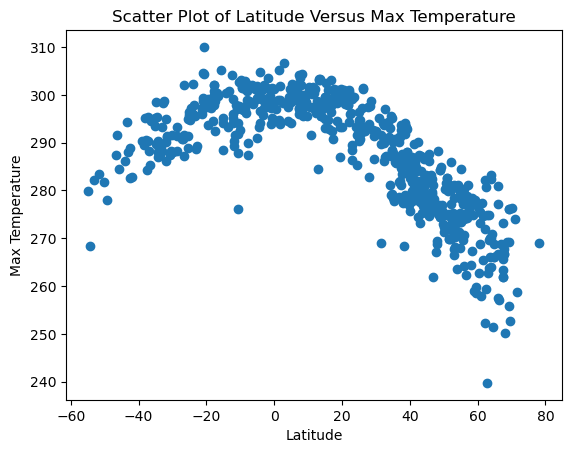

In [29]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title('Scatter Plot of Latitude Versus Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

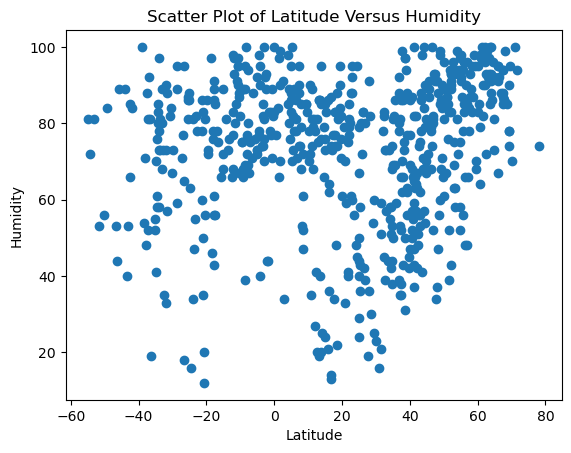

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title('Scatter Plot of Latitude Versus Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

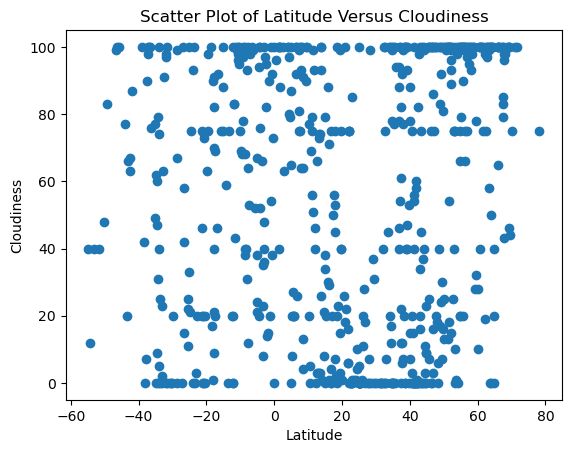

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title('Scatter Plot of Latitude Versus Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

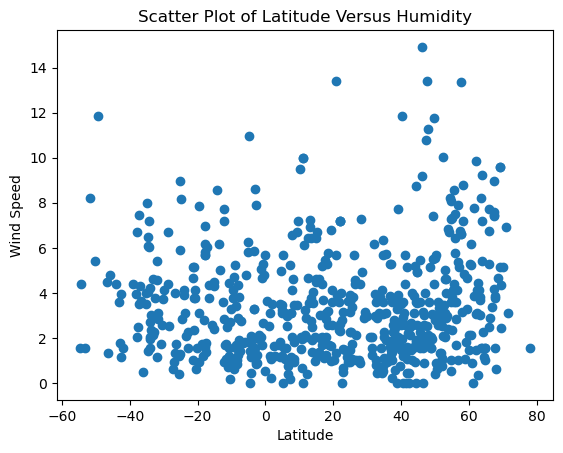

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title('Scatter Plot of Latitude Versus Humidity')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
import matplotlib.pyplot as plt
from scipy import stats

# Define a function to create Linear Regression plots; used Xpert Learning Assistant
def linear_regression_plot(x_values, y_values):
        # Perform linear regression
        slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
        # Create regression values
        line_of_regression = slope * x_values + intercept
        # Create a scatter plot
        plt.scatter(x_values, y_values, color = 'green')
        # Plot line of regression
        plt.plot(x_values, line_of_regression, color = 'red', label = 'Regression Line')
        # Annotate the line of equation
        plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.95), fontsize=12, color='red', 
                 ha='left', va='top', transform=plt.gca().transAxes)
        # R-squared value
        plt.text(0.05, 0.90, f'R² = {rvalue**2:.2f}', transform=plt.gca().transAxes)
        # Show plot
        plt.show()


In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Placerville,38.7296,-120.7986,291.71,31,0,0.00,US,1731196395
1,Buncrana,55.1333,-7.4500,284.51,92,100,3.82,IE,1731196295
3,Georgetown,5.4112,100.3354,300.11,82,20,1.54,MY,1731195756
7,Hundested,55.9667,11.8667,280.32,85,100,5.79,DK,1731196433
8,Junction city,39.0286,-96.8314,288.07,62,40,7.72,US,1731196435


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,Waitangi,-43.9535,-176.5597,286.12,89,77,4.41,NZ,1731196422
4,Ushuaia,-54.8000,-68.3000,279.96,81,40,1.54,AR,1731196323
5,Grytviken,-54.2811,-36.5092,268.28,72,12,4.40,GS,1731196429
6,Blackmans bay,-43.0167,147.3167,288.00,53,66,1.79,AU,1731196431
9,Waingapu,-9.6567,120.2641,303.00,67,69,4.13,ID,1731196437


###  Temperature vs. Latitude Linear Regression Plot

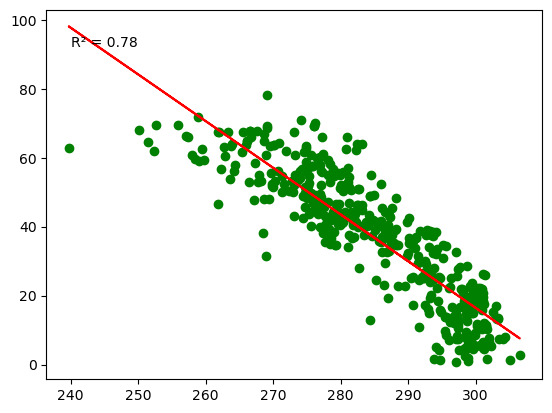

In [47]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df['Max Temp'], northern_hemi_df['Lat'])


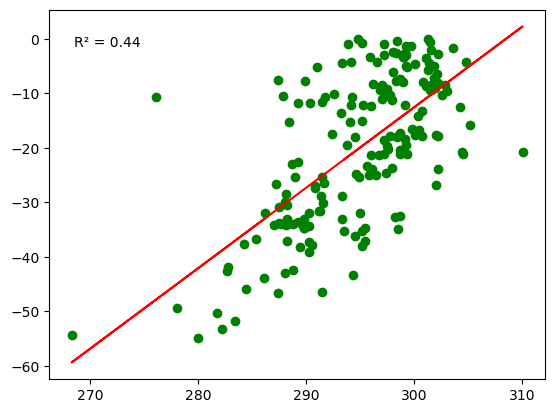

In [50]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Max Temp'], southern_hemi_df['Lat'])

**Discussion about the linear relationship:** 
The northern hemisphere has an R-squared value of 0.78. The southern hemisphere has an R-squared value of 0.44. There is a stronger relationship between maximum temperature and latitude in the northern hemisphere than the southern hemisphere. The line of regression in the northern hemisphere has a negative correlation between maximum temperature and latitude, as there value of latitude increases, the maximum temperature decreases. The line of regression in the southern hemisphere has a positive correlation where the maximum temperature increases as the latitude increases. The lower R-squared value of the southern hemisphere suggests there may be other factors that also contribute to the maximum temperature in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

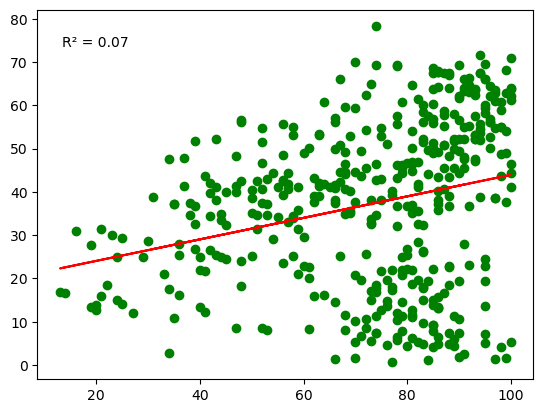

In [51]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Humidity'], northern_hemi_df['Lat'])

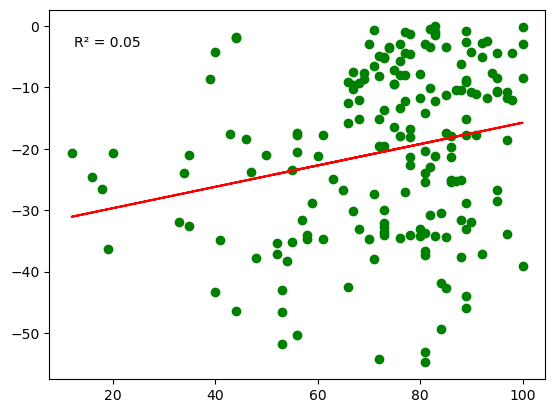

In [54]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Humidity'], southern_hemi_df['Lat'])

**Discussion about the linear relationship:** The R-squared value of northern hemisphere and southern hemisphere suggests that there is very little correlation between humidity and latitude in both hemispheres. There may be greater influences such as land features, elevation, and relative distance to the sea.

### Cloudiness vs. Latitude Linear Regression Plot

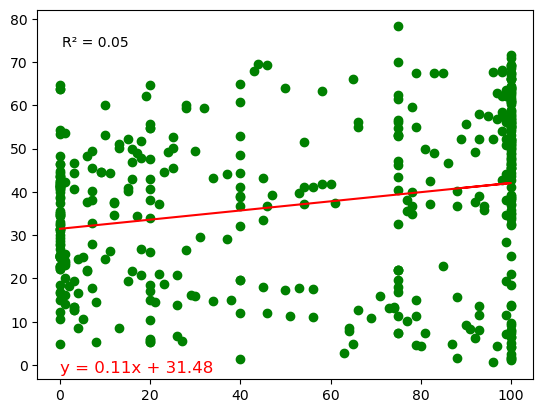

In [52]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Cloudiness'], northern_hemi_df['Lat'])

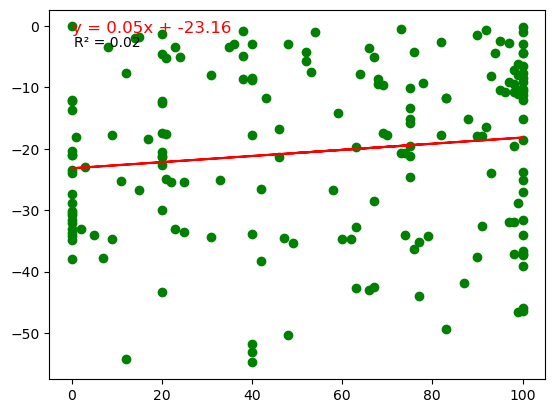

In [55]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Cloudiness'], southern_hemi_df['Lat'])

**Discussion about the linear relationship:** 
The R-squared value of northern hemisphere and southern hemisphere suggests that there is very little correlation between cloudiness and latitude in both hemispheres. There may be greater influences such as land features, elevation, and wind currents.

### Wind Speed vs. Latitude Linear Regression Plot

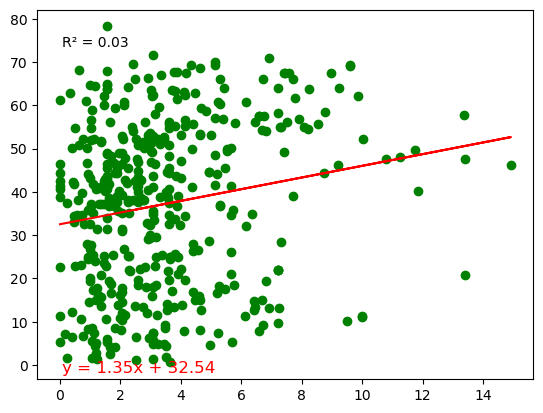

In [53]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Wind Speed'], northern_hemi_df['Lat'])

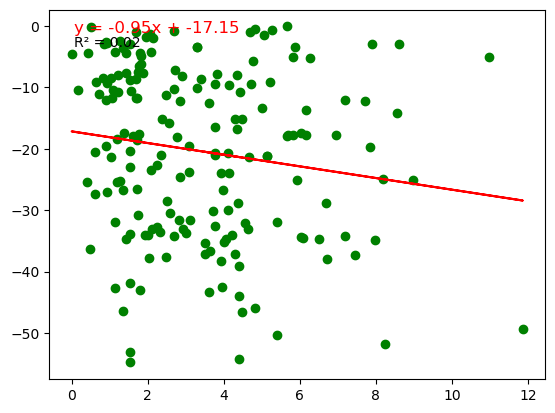

In [56]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Wind Speed'], southern_hemi_df['Lat'])

**Discussion about the linear relationship:** 
The R-squared value of northern hemisphere and southern hemisphere suggests that there is very little correlation between wind speed and latitude in both hemispheres. There may be greater influences such as land features and seasonal weather.